In [18]:
import pandas as pd

# Cargamos los csv necesarios
tweets = pd.read_csv("../Data/Tweet.csv")
company_tweet = pd.read_csv("../Data/Company_Tweet.csv")

## Análisis del Dataset

In [19]:
# Dimensiones del los datasets
print(f"Dimensiones de company_tweet: {company_tweet.shape}")
print(f"Dimensión de tweets: {tweets.shape}")

Dimensiones de company_tweet: (4336445, 2)
Dimensión de tweets: (3717964, 7)


In [20]:
tweets.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


In [21]:
company_tweet.head()

,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL


In [22]:
# Extraemos  los valores únicos de la columna 'ticker_symbol'
unique_tickers = company_tweet['ticker_symbol'].unique()

# Mostramos los tickers
print(f"Tickers de las empresas incluidas en el Dataset: {unique_tickers}")

Tickers de las empresas incluidas en el Dataset: ['AAPL' 'GOOG' 'GOOGL' 'AMZN' 'MSFT' 'TSLA']


## Procesado del Dataset

In [23]:
# Convertimos el campo post_date a formato datetime
tweets['post_date'] = pd.to_datetime(tweets['post_date'], unit='s')

# Realizamos un "merge" por el tweet_id para unir ambos DataFrames
merged_df = pd.merge(company_tweet, tweets, on='tweet_id', how='inner')

# Seleccionamos las columnas que necesitamos
final_df = merged_df[['post_date', 'ticker_symbol', 'writer', 'body', 'comment_num', 'retweet_num', 'like_num']]

# Guardamos el DataFrame final como archivo CSV
final_df.to_csv('../Data/tweet_data.csv',)

final_df.head()

,post_date,ticker_symbol,writer,body,comment_num,retweet_num,like_num
0,2015-01-01 23:59:49,AAPL,SentiQuant,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
1,2015-01-01 23:59:48,AAPL,SentiQuant,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
2,2015-01-01 23:58:16,AAPL,MacHashNews,Rumor Roundup: What to expect when you're expe...,0,0,0
3,2015-01-01 23:57:13,AAPL,WaltLightShed,"An $AAPL store line in Sapporo Japan for the ""...",2,4,4
4,2015-01-01 23:56:48,AAPL,2waystrading,$AAPL - Will $AAPL Give Second entry opportuni...,0,0,0


## Filtro por Empresa (Ticker)

In [50]:
# Cargamos el csv creado
df = pd.read_csv('../Data/tweet_data.csv')

# Seleciconamos el ticker
ticker = "TSLA"

# Filtramos los tweets
tweets_df = final_df[final_df['ticker_symbol'] == ticker]

# Filtramos los tweets populares por número de likes
likes_th = 20
best_tweets = tweets_df[tweets_df["like_num"] > likes_th]

print(best_tweets.shape)
best_tweets.describe()

(57603, 7)


,post_date,comment_num,retweet_num,like_num
count,57603,57603.000000,57603.000000,57603.000000
mean,2019-02-01 05:33:57.417130752,6.141590,10.946583,65.723365
min,2015-01-07 07:28:05,0.000000,0.000000,21.000000
25%,2018-09-22 06:22:52.500000,2.000000,3.000000,28.000000
50%,2019-03-02 21:39:25,4.000000,6.000000,40.000000
75%,2019-07-10 04:51:30.500000,7.000000,12.000000,69.000000
max,2019-12-31 21:49:55,563.000000,984.000000,999.000000
std,NaN,9.285221,23.292100,80.516195


## Visualización de los Datos

C:\Users\10644339\AppData\Local\Temp\ipykernel_5508\255990593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_tweets['post_date'] = best_tweets['post_date'].dt.date


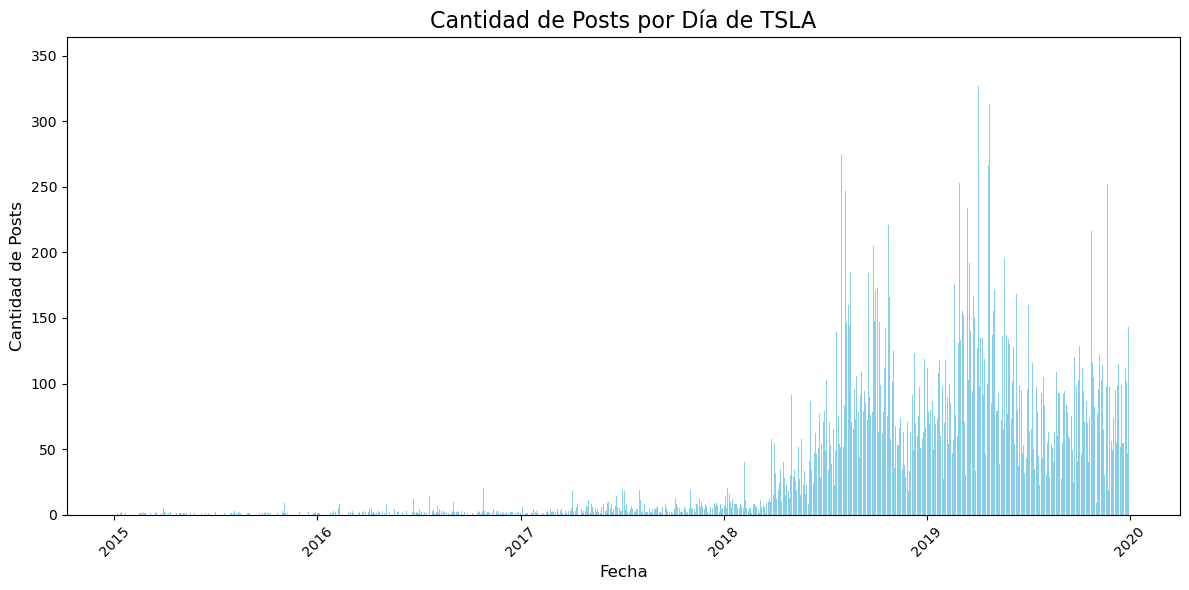

In [51]:
import matplotlib.pyplot as plt

# Creamos una nueva columna solo con la fecha (sin la hora)
best_tweets['post_date'] = best_tweets['post_date'].dt.date

# Contamos la cantidad de posts por día
posts_per_day = best_tweets['post_date'].value_counts().sort_index()

# Creamos el histograma
plt.figure(figsize=(12, 6))
plt.bar(posts_per_day.index, posts_per_day.values, color='skyblue')

# Configuración el gráfico
plt.title(f'Cantidad de Posts por Día de {ticker}', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Cantidad de Posts', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostramos el gráfico
plt.show()

In [52]:
# Guardamos el Dataset final como csv
best_tweets = best_tweets.reset_index(drop=True)
best_tweets.to_csv(f"../Data/{ticker}_Tweets.csv", index=False)
best_tweets.head()

,post_date,ticker_symbol,writer,body,comment_num,retweet_num,like_num
0,2015-01-07,TSLA,CNNBusiness,The 7 most-searched stocks:7. $FB6. $TSLA5. $F...,3,27,21
1,2015-01-12,TSLA,JustinPulitzer,Weekend Review VIDEO (1/11/15): $SPY $IWM $QQQ...,4,9,22
2,2015-01-14,TSLA,philstockworld,Global GDP Cut by 10% is PERFECT for our Hedge...,1,0,22
3,2015-01-14,TSLA,MarketWatch,Tesla CEO Elon Musk says the company won't mak...,6,48,28
4,2015-01-18,TSLA,Stocktwits,15 rules for investing in technology. Written ...,0,44,44


## Predicción de sentimiento

In [53]:
from transformers import pipeline, DistilBertTokenizer, DistilBertForSequenceClassification

# Ruta del mejor checkpoint
best_checkpoint = '../Sentiment_Model/TFM/results/checkpoint-5358'

# Extraemos el body de los tweets
tweets = best_tweets["body"].tolist()

# Cargamos modelo y tokenizador del mejor checkpoint
best_checkpoint = '../Sentiment_Model/TFM/results/checkpoint-5358'
model = DistilBertForSequenceClassification.from_pretrained(best_checkpoint)
tokenizer = DistilBertTokenizer.from_pretrained(best_checkpoint)

# Creamos un pipeline para la inferencia
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer, device=0)

# Configuramos el tamaño de lote
batch_size = 64

# Función para procesar lotes
def predict_in_batches(tweets, batch_size):
    predictions = []
    for i in range(0, len(tweets), batch_size):
        batch = tweets[i:i+batch_size]
        batch_predictions = classifier(batch)
        predictions.extend(batch_predictions)
    return predictions

# Realizamos las predicciones en lotes
predictions = predict_in_batches(tweets, batch_size)


Device set to use cpu


In [54]:
# Agregamos las predicciones al DataFrame original
best_tweets["sentiment"] = [pred["label"] for pred in predictions]
best_tweets["sentiment_score"] = [pred["score"] for pred in predictions]

# Definimos el mapeo de las etiquetas
sentiment_mapping = {"LABEL_0": "Neutral", "LABEL_1": "Positive", "LABEL_2": "Negative"}

# Aplicamos el mapeo al DataFrame
best_tweets["sentiment"] = best_tweets["sentiment"].map(sentiment_mapping)

# Verificamos los resultados
print(f"Número de tweets por sentimiento:\n {best_tweets["sentiment"].value_counts()}")
best_tweets

Número de tweets por sentimiento:
 sentiment
Negative    34951
Positive    12765
Neutral      9887
Name: count, dtype: int64


,post_date,ticker_symbol,writer,body,comment_num,retweet_num,like_num,sentiment,sentiment_score
0,2015-01-07,TSLA,CNNBusiness,The 7 most-searched stocks:7. $FB6. $TSLA5. $F...,3,27,21,Neutral,0.823433
1,2015-01-12,TSLA,JustinPulitzer,Weekend Review VIDEO (1/11/15): $SPY $IWM $QQQ...,4,9,22,Neutral,0.910706
2,2015-01-14,TSLA,philstockworld,Global GDP Cut by 10% is PERFECT for our Hedge...,1,0,22,Positive,0.731634
3,2015-01-14,TSLA,MarketWatch,Tesla CEO Elon Musk says the company won't mak...,6,48,28,Negative,0.721946
4,2015-01-18,TSLA,Stocktwits,15 rules for investing in technology. Written ...,0,44,44,Neutral,0.985893
...,...,...,...,...,...,...,...,...,...
57598,2019-12-31,TSLA,HedgehogOptions,Huge huge happy prosperous 2020 to everyone 20...,5,0,23,Positive,0.922866
57599,2019-12-31,TSLA,stockstobuy,My Top #Stocks for 2020 (S&P @ 3231)Growth - S...,4,5,26,Positive,0.770112
57600,2019-12-31,TSLA,TeslaHistorian,"Hey @ChrisSpelter, does this mean $TSLA is wor...",2,0,43,Neutral,0.827642
57601,2019-12-31,TSLA,TeslaHistorian,"Hey @hchc80, I'm glad $TSLA is neither of thos...",1,0,37,Negative,0.935562


In [55]:
print(f"Estadísitcas de los tweets de {ticker}:\n{best_tweets["sentiment_score"].describe()}")

Estadísitcas de los tweets de TSLA:
count    57603.000000
mean         0.841314
std          0.171457
min          0.337488
25%          0.721510
50%          0.917335
75%          0.986747
max          0.999582
Name: sentiment_score, dtype: float64


In [ ]:
# Guardamos el Dataset como CSV
best_tweets.to_csv(f"../Data/tweets_sentiment_{ticker}.csv")